## Description
This notebook contains the exploration for the various image descriptors and processing with OpenCV.

Descriptors:
- SIFT
- SURF

Transformations:
- Scaling
- Rotation
- Translation

Matching:
- 


### SIFT

In [65]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
%matplotlib inline

current_dir = os.getcwd()
img = cv.imread(os.path.join(current_dir, 'images/100200.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) # set image to grey

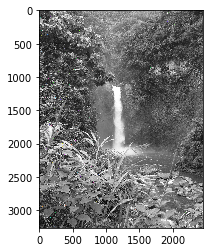

In [69]:
sift = cv.xfeatures2d.SIFT_create(nfeatures=800)
kp = sift.detect(gray,None)     # detect keypoints from the image
img = cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)

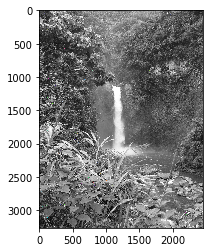

In [70]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)

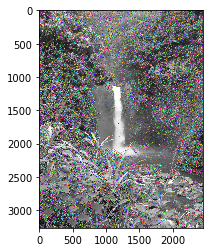

In [71]:
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img=cv.drawKeypoints(gray,kp,img)
plt.imshow(img)

## SURF

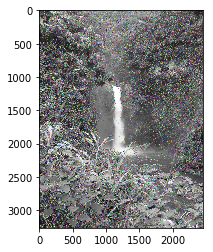

In [72]:
surf = cv.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)
img=cv.drawKeypoints(gray,kp,img)
plt.imshow(img)

## Resizing

In [92]:
img = cv.imread(os.path.join(current_dir, 'images/100200.jpg'))
height, width = img.shape[:2]

res = cv.resize(img,(5*width, 5*height), interpolation = cv.INTER_CUBIC)

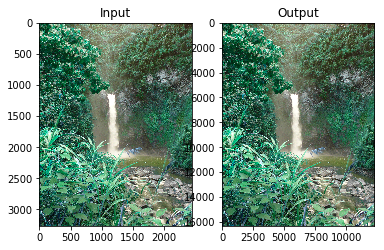

In [93]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(res),plt.title('Output')
plt.show()

## Translation

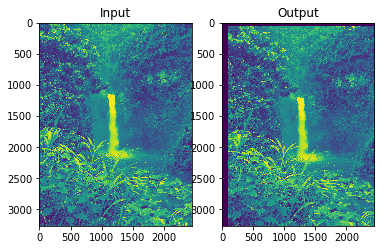

True

In [112]:
import numpy as np
import cv2 as cv
img = cv.imread(os.path.join(current_dir, 'images/100200.jpg'), 0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

cv.imwrite('translated.jpg',dst)

## Rotation

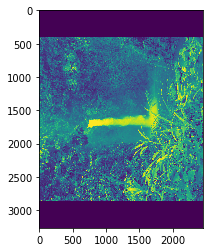

True

In [106]:
img = cv.imread(os.path.join(current_dir, 'images/100200.jpg'), 0)
rows,cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst), plt.show()
cv.imwrite('rotated.jpg',dst)

## Perspective Transformation

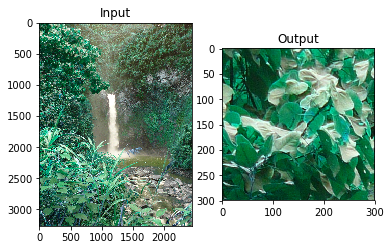

True

In [103]:
img = cv.imread(os.path.join(current_dir, 'images/100200.jpg'))
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
cv.imwrite('perspective.jpg', dst)

## Feature match

### BFMatcher

In [113]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(os.path.join(current_dir, 'images/100200.jpg'),cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(os.path.join(current_dir, 'translated.jpg'),cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

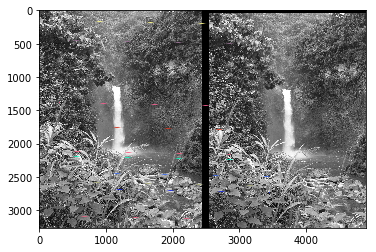

(<matplotlib.image.AxesImage at 0x11e46e940>, None)

In [114]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### BFMatcher with knnMatch

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(os.path.join(current_dir, 'images/100200.jpg'),cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(os.path.join(current_dir, 'translated.jpg'),cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### FlannBased Matcher

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread(os.path.join(current_dir, 'images/100200.jpg'),cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(os.path.join(current_dir, 'translated.jpg'),cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()